In [1]:
# import VGG and other packages from tensorflow
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#finding images from local devices
import pandas

import os, fnmatch
from shutil import copyfile

def find(pattern, path, flag=False):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                if flag:
                    result.append(name)
                else:
                    result.append(r'{}/{}'.format(path,name))
    return result

Get all images for ramdom sampled experiment

In [19]:
img_path=(find('*.jpg',rf'C:\Psychopy\Experiment\Dog experiment\first 250 trials\images')
          +find('*.jpg',rf'C:\Psychopy\Experiment\Dog experiment\second 250-500 trials\images')
          +find('*.jpg',rf'C:\Psychopy\Experiment\Dog experiment\third 500-750 trials\images')
          +find('*.jpg',rf'C:\Psychopy\Experiment\Dog experiment\fourth 750-1000 trials\images'))

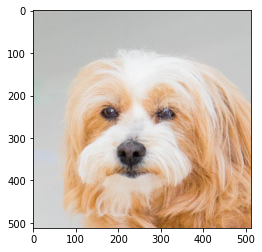

In [20]:
#plot out the image
plt.imshow(plt.imread(img_path[0]))

In [21]:
# Check the size of data we just import
print(len(img_path))

2000


In [22]:
# Check the format of image's name
print(img_path[0])

C:\Psychopy\Experiment\Dog experiment\first 250 trials\images/flickr_dog_000002.jpg


Import fully sampled data

In [23]:
img_path = find('*.jpg',rf'C:\Psychopy\Experiment\Cat experiment\Fully sample 0-300 trials\images')

extract feature of images from vgg-19

In [24]:
# extract feature of images from vgg-19
#setup VGG-19 model
model = VGG19()

model = Model(inputs = model.inputs, outputs = model.layers[-2].output) #model.layers[-2] for fc2, model.layers[-3] for fc1
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
features=[]
t=[]
for data in img_path:

    img = image.load_img(data,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)


    feature_map=model.predict(img)
    features.append(feature_map[0])
    

In [26]:
# transform the feature's typr into np array
for i in range(len(features)):
    features[i]=np.ndarray.tolist(features[i])

In [27]:
# set up data structure for storing
# Format:
#        df={ image_name: image_features}

df={}

for name,feature in zip(img_path,features):
    df[f'{name}']=feature

In [12]:
# data save
np.save('the direction you would like to store',df)

########The rest is the tutorial of extraction features from VGG - 19. ########

In [2]:
print('Extract features with VGG19')
model = VGG19(weights='imagenet',include_top=False)

img_path = r'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\CV project with Dr,Xiao\Experiment\Dog experiment\dog dataset\flickr_dog_000002.jpg'

img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

feature_shape=[]
feature=[]

features = model.predict(x)
feature_shape.append(features.shape)
feature.append(features)
print(features.shape)
print(features)

Extract features with VGG19
(1, 7, 7, 512)
[[[[ 0.          0.          0.         ...  0.          4.233142
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.77967334
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

 

In [3]:
print('Summarize feature map size for each conv layer with VGG19')
for i in range(len(model.layers)):
    layer = model.layers[i]
    
    print(i,layer.name, layer.output.shape)

Summarize feature map size for each conv layer with VGG19
0 input_1 (None, None, None, 3)
1 block1_conv1 (None, None, None, 64)
2 block1_conv2 (None, None, None, 64)
3 block1_pool (None, None, None, 64)
4 block2_conv1 (None, None, None, 128)
5 block2_conv2 (None, None, None, 128)
6 block2_pool (None, None, None, 128)
7 block3_conv1 (None, None, None, 256)
8 block3_conv2 (None, None, None, 256)
9 block3_conv3 (None, None, None, 256)
10 block3_conv4 (None, None, None, 256)
11 block3_pool (None, None, None, 256)
12 block4_conv1 (None, None, None, 512)
13 block4_conv2 (None, None, None, 512)
14 block4_conv3 (None, None, None, 512)
15 block4_conv4 (None, None, None, 512)
16 block4_pool (None, None, None, 512)
17 block5_conv1 (None, None, None, 512)
18 block5_conv2 (None, None, None, 512)
19 block5_conv3 (None, None, None, 512)
20 block5_conv4 (None, None, None, 512)
21 block5_pool (None, None, None, 512)


In [49]:
#Visualization

Visualizing the Feature Map for the First Convolutional Layer in the VGG19 Model for an Input Image
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


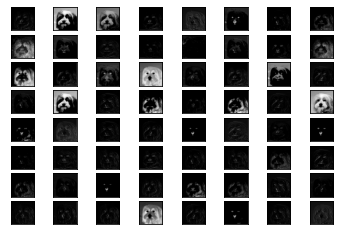

In [4]:
print('Visualizing the Feature Map for the First Convolutional Layer in the VGG19 Model for an Input Image')

model = VGG19()
model = Model(inputs = model.inputs, outputs = model.layers[1].output)
model.summary()

img_path = r'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\CV project with Dr,Xiao\Experiment\Dog experiment\dog dataset\flickr_dog_000002.jpg'

img = image.load_img(img_path,target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)


feature_map=model.predict(img)

square = 8
ix=1
for _ in range(square):
    for _ in range(square):
        
        ax = plt.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_map[0,:,:,ix-1],cmap='gray')
        ix+=1
plt.show()

In [14]:
print('Visualizing the Feature Map for the Final Convolutional Layer in the VGG19 Model for an Input Image')

model = VGG19()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
model.summary()

img_path = r'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\CV project with Dr,Xiao\Experiment\Dog experiment\dog dataset\flickr_dog_000002.jpg'

img = image.load_img(img_path,target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)


feature_map=model.predict(img)

print(feature_map.shape)
# square = 8
# ix=1
# for _ in range(square):
#     for _ in range(square):
        
#         ax = plt.subplot(square,square,ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         plt.imshow(feature_map[0,:,:,ix-1],cmap='gray')
#         ix+=1
# plt.show()

Visualizing the Feature Map for the Final Convolutional Layer in the VGG19 Model for an Input Image
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________

In [16]:
print('Visualizing the Feature Map for the Final Convolutional Layer in the VGG19 Model for an Input Image')

model = VGG19()
model = Model(inputs = model.inputs, outputs = model.layers[3].output)
model.summary()

img_path = r'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\CV project with Dr,Xiao\Experiment\Dog experiment\dog dataset\flickr_dog_000002.jpg'

img = image.load_img(img_path,target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)


feature_map=model.predict(img)

print(feature_map.shape)
print(feature_map.flatten().shape)
# square = 8
# ix=1
# for _ in range(square):
#     for _ in range(square):
        
#         ax = plt.subplot(square,square,ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         plt.imshow(feature_map[0,:,:,ix-1],cmap='gray')
#         ix+=1
# plt.show()

Visualizing the Feature Map for the Final Convolutional Layer in the VGG19 Model for an Input Image
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
(1, 112, 112, 64)
(802816,)


Visualize feature maps from the five main blocks of the VGG19 modell
input_34


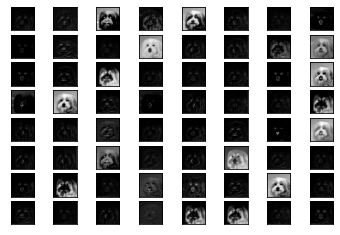

block1_conv1


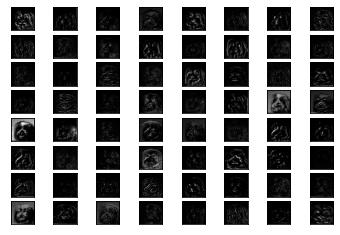

block1_conv2


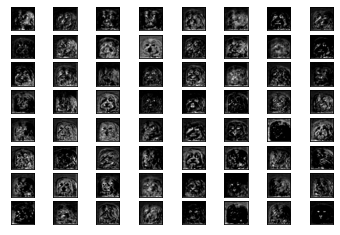

block1_pool


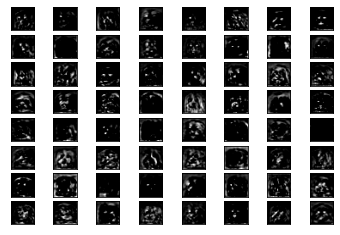

block2_conv1


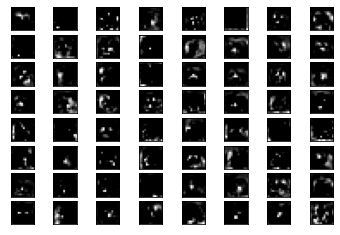

In [74]:
print('Visualize feature maps from the five main blocks of the VGG19 modell')

model = VGG19()
ixs=[2,5,9,13,17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

img_path = r'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\CV project with Dr,Xiao\Experiment\Dog experiment\dog dataset\flickr_dog_000002.jpg'

img = image.load_img(img_path,target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)

feature_maps=model.predict(img)

square = 8
for i,fmap in enumerate(feature_maps):
    ix=1
    print(model.layers[i].name)
    for _ in range(square):
        for _ in range(square):
            
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0,:,:,ix-1],cmap='gray')
            ix+=1
    plt.show()

In [ ]:
square = 8

for fmap in feature:
    ix=1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0,:,:,ix-1],cmap='gray')
            ix+=1
    plt.show()
    break